In [ ]:
import cv2
import glob
import os
import numpy as np
import pandas as pd

In [ ]:
train_data_path = "/content/drive/MyDrive/temp/Dataset_4-Oct/train"
test_data_path = "/content/drive/MyDrive/temp/Dataset_4-Oct/test"
# train_labels_path = "/content/drive/MyDrive/temp/Dataset_4-Oct/train.csv"
# test_labels_path = "/content/drive/MyDrive/temp/Dataset_4-Oct/test.csv"

In [ ]:
train_video_paths = [i for i in glob.glob(f"{train_data_path}/*.avi")]
len(train_video_paths)

49

In [ ]:
train_video_paths

['/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_2_video3.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_2_video7.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_1_video2.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_2_video1.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_2_video5.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_1_video6.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_9_video1.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_3_video1.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_5_video1.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_1_video8.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_0_video2.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_1_video3.avi',
 '/content/drive/MyDrive/temp/Dataset_4-Oct/train/class0_batch_2

In [ ]:
def get_frames_labels(vid_path, vid_class):
    
    vidcap = cv2.VideoCapture(vid_path)
    success, frame = vidcap.read()
    stacked_frames = ""
    frame_count = 0
    while success:
        if stacked_frames == "":
            stacked_frames = frame[np.newaxis, ...]
        else:
            stacked_frames = np.concatenate((stacked_frames, frame[np.newaxis, ...]), axis=0)
        
        success, frame = vidcap.read()
        frame_count += 1

    # stacked_labels = np.array([vid_class]*frame_count)
    stacked_labels = np.array([vid_class])
    return stacked_frames, stacked_labels

In [ ]:
data_X_train = []
data_y_train = []

vid_class_0_count = 0
vid_class_1_count = 0

for vid_path in train_video_paths:

    vid_name = os.path.split(vid_path)[1]
    vid_class = int(vid_name.split("_")[0][-1])

    if vid_class == 0:
        vid_class_0_count += 1
        if vid_class_0_count <= 3:
            stacked_frames, stacked_labels = get_frames_labels(vid_path, vid_class)
            data_X_train.append(stacked_frames)
            data_y_train.append(stacked_labels)
    elif vid_class == 1:
        vid_class_1_count += 1
        if vid_class_1_count <= 3:
            stacked_frames, stacked_labels = get_frames_labels(vid_path, vid_class)
            data_X_train.append(stacked_frames)
            data_y_train.append(stacked_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [ ]:
len(data_X_train)

6

In [ ]:
len(data_y_train)

6

In [ ]:
for vid in data_X_train:
    print(vid.shape)

(301, 480, 640, 3)
(301, 480, 640, 3)
(304, 480, 640, 3)
(295, 480, 640, 3)
(302, 480, 640, 3)
(302, 480, 640, 3)


In [ ]:
for vid in data_y_train:
    print(vid.shape)

(1,)
(1,)
(1,)
(1,)
(1,)
(1,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, utils, applications

In [ ]:
tensors = [tf.convert_to_tensor(i) for i in data_X_train]
X_train = tf.ragged.stack(tensors).to_tensor()

tensors = [tf.convert_to_tensor(i) for i in data_y_train]
y_train = tf.ragged.stack(tensors).to_tensor()

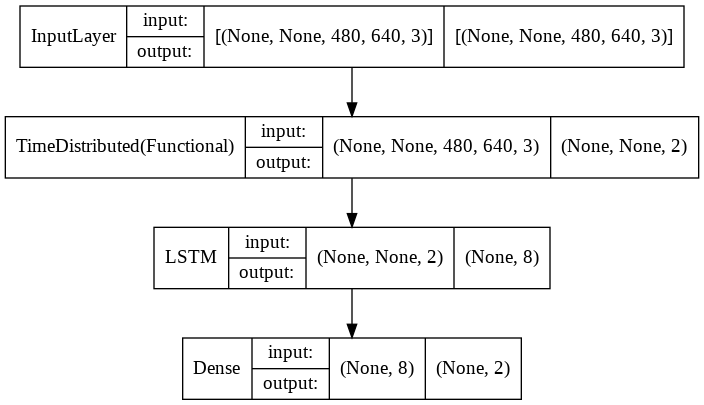

In [ ]:
inp = layers.Input((None, 480, 640, 3), ragged=True)

cnn = tf.keras.applications.DenseNet169(include_top=True, 
                                                weights=None, 
                                                input_tensor=None, 
                                                input_shape=(480, 640, 3), #<----- input shape for cnn is just the image
                                                pooling=None,
                                                classes=2)

x = layers.TimeDistributed(cnn)(inp)
x = layers.LSTM(8)(x)
out = layers.Dense(2)(x)

model = Model(inp, out)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics='accuracy')

utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2


ResourceExhaustedError: ignored